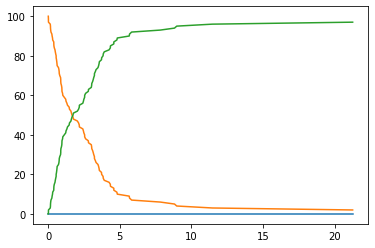

In [22]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#implements the Gillespie Direct Method algorithm for a basic SIR model
#
# 2014-10-12 rev 5
# refactor to do everything on an array

def runSim():
    """simulation function"""
    #print "Test2"
    tmax = 20                            #simulation time (years)
    N_init = 10000                      #initial population size
    S_init = 0                          #initial susceptible population
    E_init = 100                          #initial exposed population
    I_init = 0                          #initial infected population
    R_init = N_init - S_init - I_init - E_init   # initial recovered populataion
    t = 0                               #initial time
    mu = 0#1.00/70                        #death rate
    gamma = 1#365.00/10                   #recovery rate
    #R_0 = 15.00                         #R_0, basic reproductive ratio
    nsims = 10                          #number of simulations to run
    nu = mu                             # birth rate
    alpha = 0.4#365.00/10                   #Latent period
    beta = 2.4#R_0*(gamma + mu)*(alpha+mu)/alpha   #transmission rate
    #n                                  #which simulation, needed when looping
    j = 1
    #S, E, I, R = S_init, E_init, I_init, R_init
    #N = N_init
    dataArray = np.array([t, N_init, S_init, E_init, I_init, R_init])
    tNSEIR = dataArray
    p_birth = nu*dataArray[1]          #probability parameters (initial values)
    p_sdeath = mu*dataArray[2]
    p_infection = beta*dataArray[2]*dataArray[4]/dataArray[1]
    p_edeath = mu*dataArray[3]
    p_symptom = alpha*dataArray[3]
    p_ideath = mu*dataArray[4]
    p_recovery = gamma*dataArray[5]
    p_rdeath = mu*dataArray[5]
    t_append = 0.0                       #time to append to dataArray
    while t < tmax:
        A = p_birth+p_sdeath+p_infection+p_edeath+p_symptom+p_ideath+p_recovery+p_rdeath
    #sum of the transmission rates
        y_1, y_2 = random.random(), random.random() # generate 2 random numbers in [0,1)
        dt = -math.log(y_1)/A           #time step: time until next event
    #simulate each event individually, update SEIRN and parameters
        if y_2 < p_birth/A:                                         #Birth
            tNSEIR = tNSEIR + [0, 1, 1, 0, 0, 0]                  
            p_birth = mu*tNSEIR[1]
            p_sdeath = mu*tNSEIR[2]
        elif y_2 < (p_birth+p_sdeath)/A:                            #S death
            tNSEIR = tNSEIR + [0, -1, -1, 0, 0, 0]
            p_birth = mu*tNSEIR[1]
            p_sdeath = mu*tNSEIR[2]
        elif y_2 < (p_birth+p_sdeath+p_infection)/A:                #infection
            tNSEIR = tNSEIR + [0, 0, -1, 1, 0, 0]
            p_sdeath = mu*tNSEIR[2]
            p_edeath = mu*tNSEIR[3]
            p_symptom = alpha*tNSEIR[3]
        elif y_2 < (p_birth+p_sdeath+p_infection+p_edeath)/A:       #E death
            tNSEIR = tNSEIR + [0, -1, 0, -1, 0, 0]
            p_birth = mu*tNSEIR[1]
            p_edeath = mu*tNSEIR[3]
            p_symptom = alpha*tNSEIR[3]
        elif y_2 < (p_birth+p_sdeath+p_infection+p_edeath+p_symptom)/A: #onset
            tNSEIR = tNSEIR + [0, 0, 0, -1, 1, 0]
            p_edeath = mu*tNSEIR[3]
            p_symptom = alpha*tNSEIR[3]
            p_ideath = mu*tNSEIR[4]
        elif y_2 < (p_birth+p_sdeath+p_infection+p_edeath+p_symptom+p_ideath)/A: #ideath  
            tNSEIR = tNSEIR + [0, -1, 0, 0, -1, 0]
            p_birth = mu*tNSEIR[1]
            p_ideath = mu*tNSEIR[4]
            p_recovery = gamma*tNSEIR[4]
        elif y_2 < (p_birth+p_sdeath+p_infection+p_edeath+p_symptom+p_ideath+p_recovery)/A:   #recovery
            tNSEIR = tNSEIR + [0, 0, 0, 0, -1, 1]
            p_ideath = mu*tNSEIR[4]
            p_recovery = gamma*tNSEIR[4]
            p_rdeath = mu*tNSEIR[5]
        else:                                                           #R death 
            tNSEIR = tNSEIR + [0, -1, 0, 0, 0, -1]
            p_rdeath = mu*tNSEIR[5]
        p_infection=beta*tNSEIR[2]*tNSEIR[4]/tNSEIR[1]
        tNSEIR = tNSEIR + [dt, 0, 0, 0, 0, 0]
        if t > t_append:
            t_append = t_append + 1.0/356.0
            dataArray = np.vstack((dataArray,tNSEIR))
            t = t + dt
        else:
            t = t + dt
    #plt.figure() 
    #plt.ioff()
    plt.plot(dataArray[:,0],dataArray[:,2])
    #plt.hold(True)
    plt.plot(dataArray[:,0],dataArray[:,3])
    plt.plot(dataArray[:,0],dataArray[:,4])
    #plt.axis([0,1,0,5000])
    plt.show()

runSim()